In [ ]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

In [17]:
import joblib

# Memuat data yang telah disimpan
X_train = joblib.load('X_train.pkl')
X_test = joblib.load('X_test.pkl')
y_train = joblib.load('y_train.pkl')
y_test = joblib.load('y_test.pkl')


In [51]:
# Import pustaka yang diperlukan
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Membuat dan melatih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Memprediksi hasil pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy * 100:.2f}%')



Akurasi Model: 86.67%


In [19]:
# Melihat fitur yang paling penting
importances = model.feature_importances_
print(f'Fitur Penting: {importances}')


Fitur Penting: [0.20013431 0.05603665 0.03431125 0.14814929 0.09461039 0.10547224
 0.14249699 0.05333406 0.14990023 0.01555459]


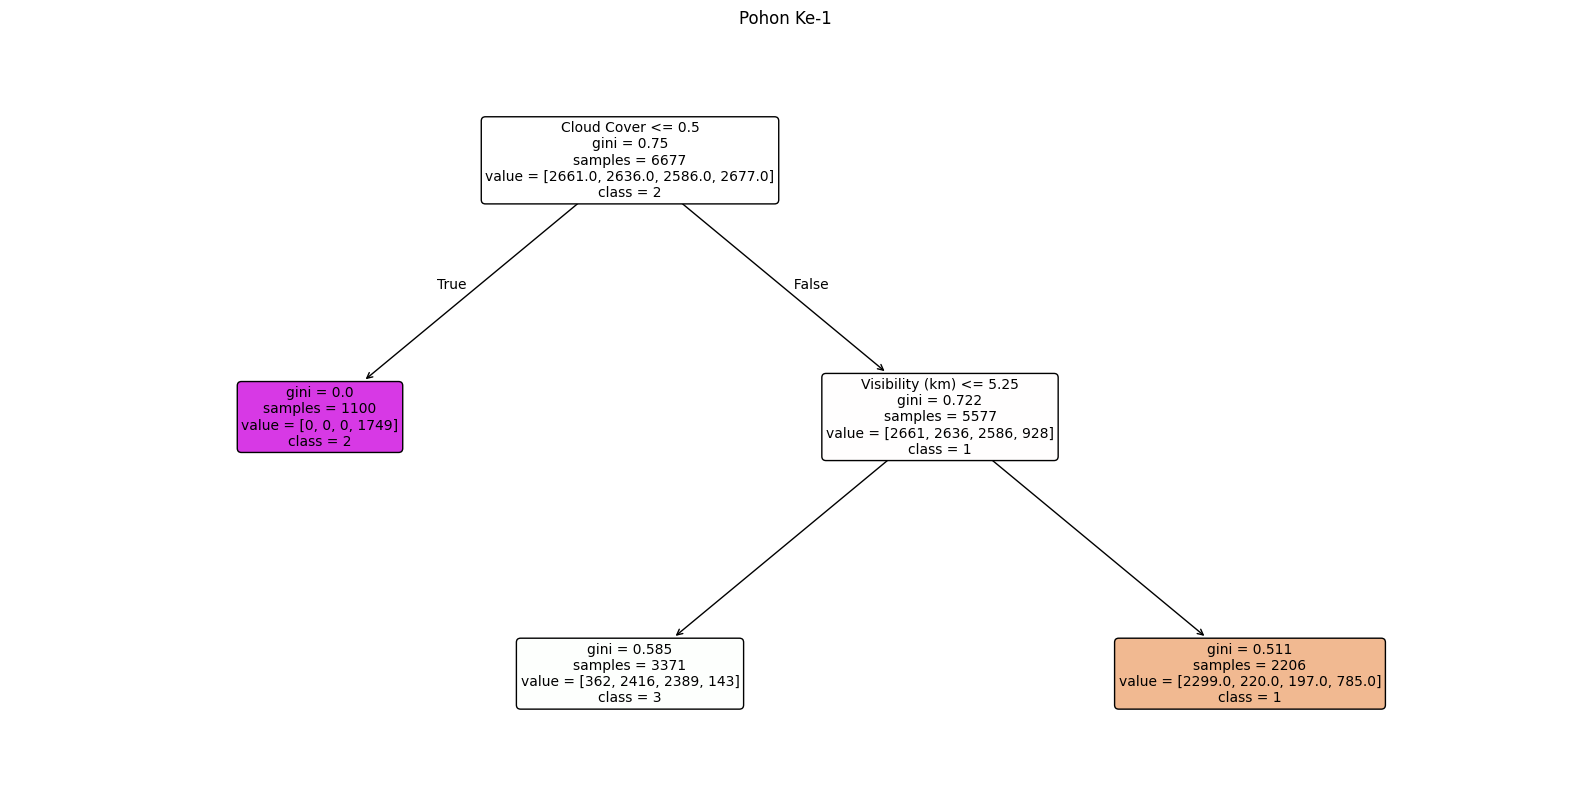

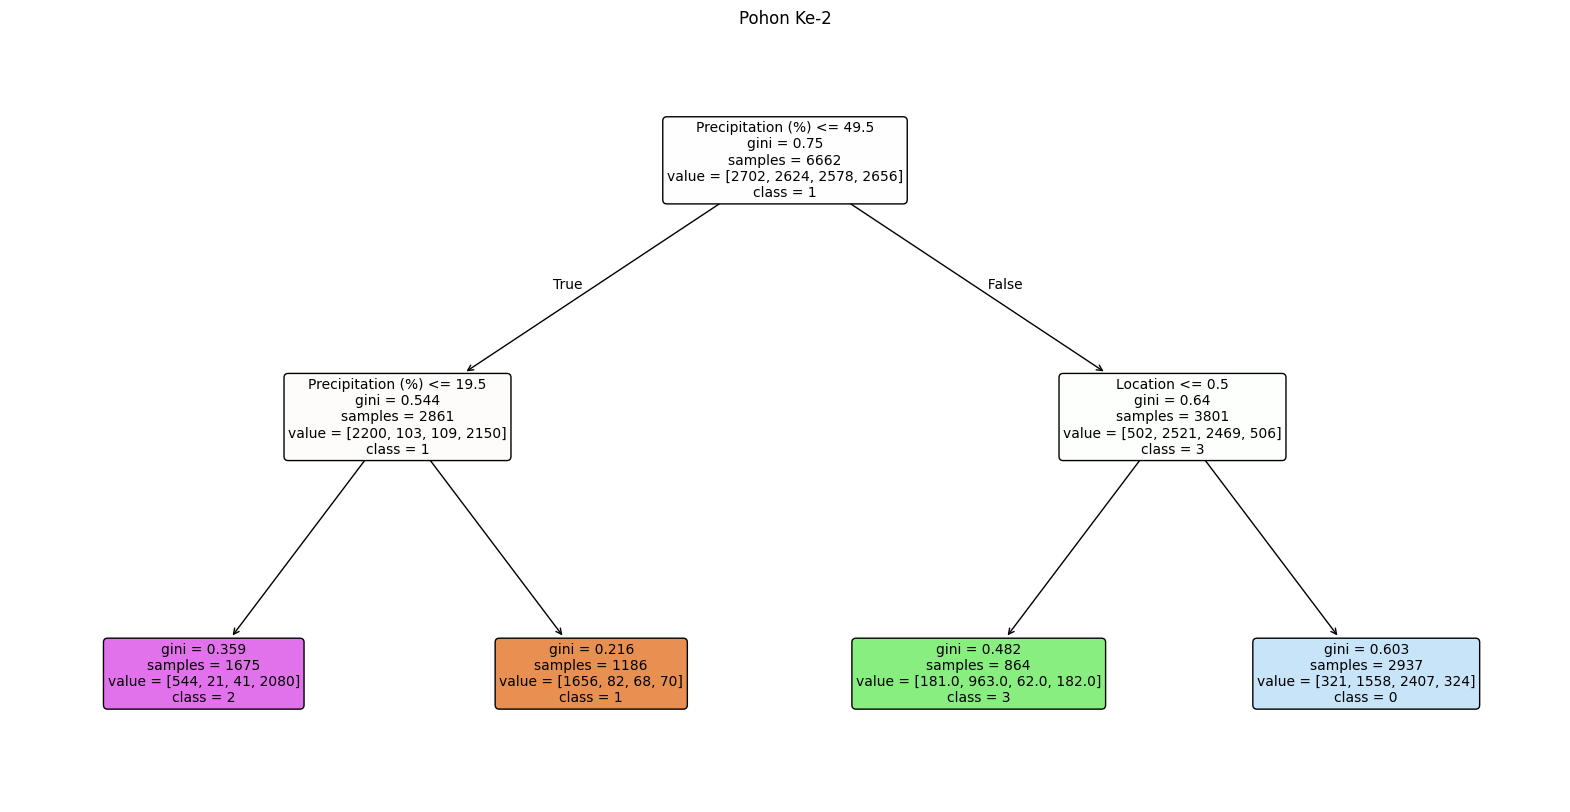

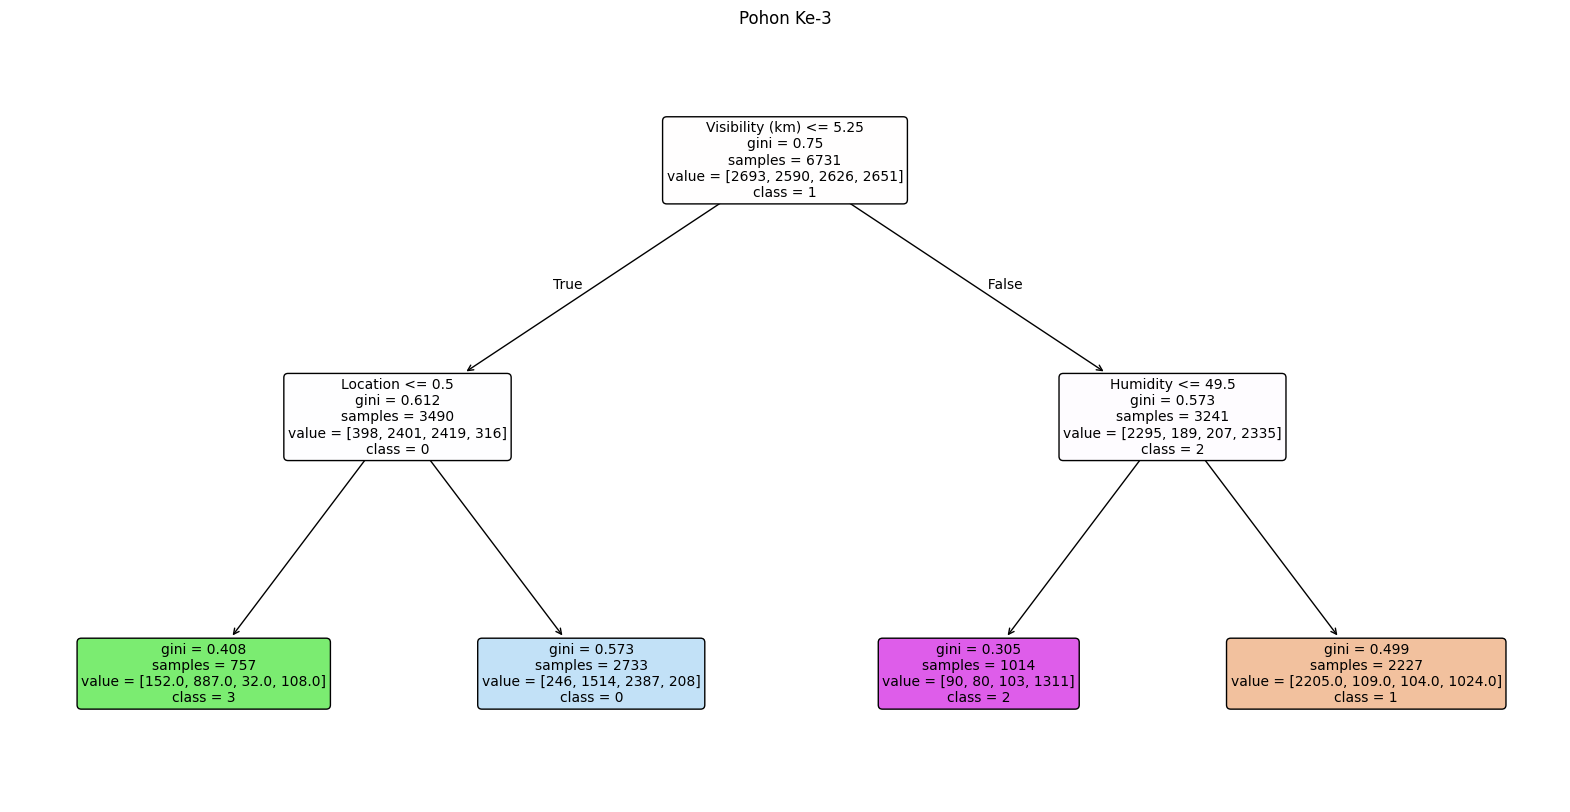

In [36]:
import joblib
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Memuat nama kolom fitur dan y_train
feature_names = joblib.load('feature_names.pkl')
y_train = joblib.load('y_train.pkl')

# Menentukan jumlah pohon yang ingin digambar (misalnya, 3 pohon pertama)
n_trees_to_plot = 3  # Ubah sesuai kebutuhan (misalnya 3 pohon pertama)

# Menampilkan beberapa pohon dalam Random Forest
for i in range(min(n_trees_to_plot, len(model.estimators_))):  # Model estimators berisi pohon-pohon
    tree = model.estimators_[i]  # Memilih pohon ke-i
    plt.figure(figsize=(20, 10))  # Menetapkan ukuran gambar lebih besar
    plot_tree(tree, filled=True, feature_names=feature_names, class_names=[str(cls) for cls in y_train.unique()], rounded=True, fontsize=10)
    plt.title(f"Pohon Ke-{i+1}")
    plt.show()




In [38]:
import numpy as np

# Input data dengan 10 fitur (disesuaikan dengan fitur yang digunakan model)
input_data = np.array([[3.5, 0.3, 6.0, 45.0, 20.0, 30.0, 1012, 1, 0, 5]])  # Sesuaikan nilai dengan 10 fitur yang digunakan model

# Melakukan prediksi
prediksi = model.predict(input_data)

# Menampilkan hasil prediksi
print("Prediksi Kelas Cuaca: ", prediksi)



Prediksi Kelas Cuaca:  [2]


C:\Users\rizky\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [39]:
# Cek nilai unik dalam kolom target (misalnya 'Weather Type')
print(np.unique(y_train))  # Jika y_train adalah target label yang digunakan saat pelatihan


[0 1 2 3]


In [44]:
# Pemetaan kelas ke tipe cuaca berdasarkan analisis dataset
class_mapping = {0: 'Sunny', 1: 'Rainy', 2: 'Cloudy', 3: 'Snowy'}

# Input data untuk prediksi (misalnya, sesuaikan dengan data fitur yang relevan)
input_data = np.array([[3.5, 0.3, 6.0, 45.0, 20.0, 30.0, 1012, 1, 0, 5]]) 

# Melakukan prediksi
prediksi = model.predict(input_data)

# Mengonversi hasil prediksi ke tipe cuaca yang mudah dimengerti
predicted_weather = [class_mapping[pred] for pred in prediksi]  # Prediksi untuk setiap input

# Menampilkan hasil prediksi dalam bentuk tipe cuaca
print(f"Prediksi cuaca: {predicted_weather}")


Prediksi cuaca: ['Cloudy']


C:\Users\rizky\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [52]:
print(y.value_counts())


Weather Type
3    80
2    77
1    73
0    70
Name: count, dtype: int64


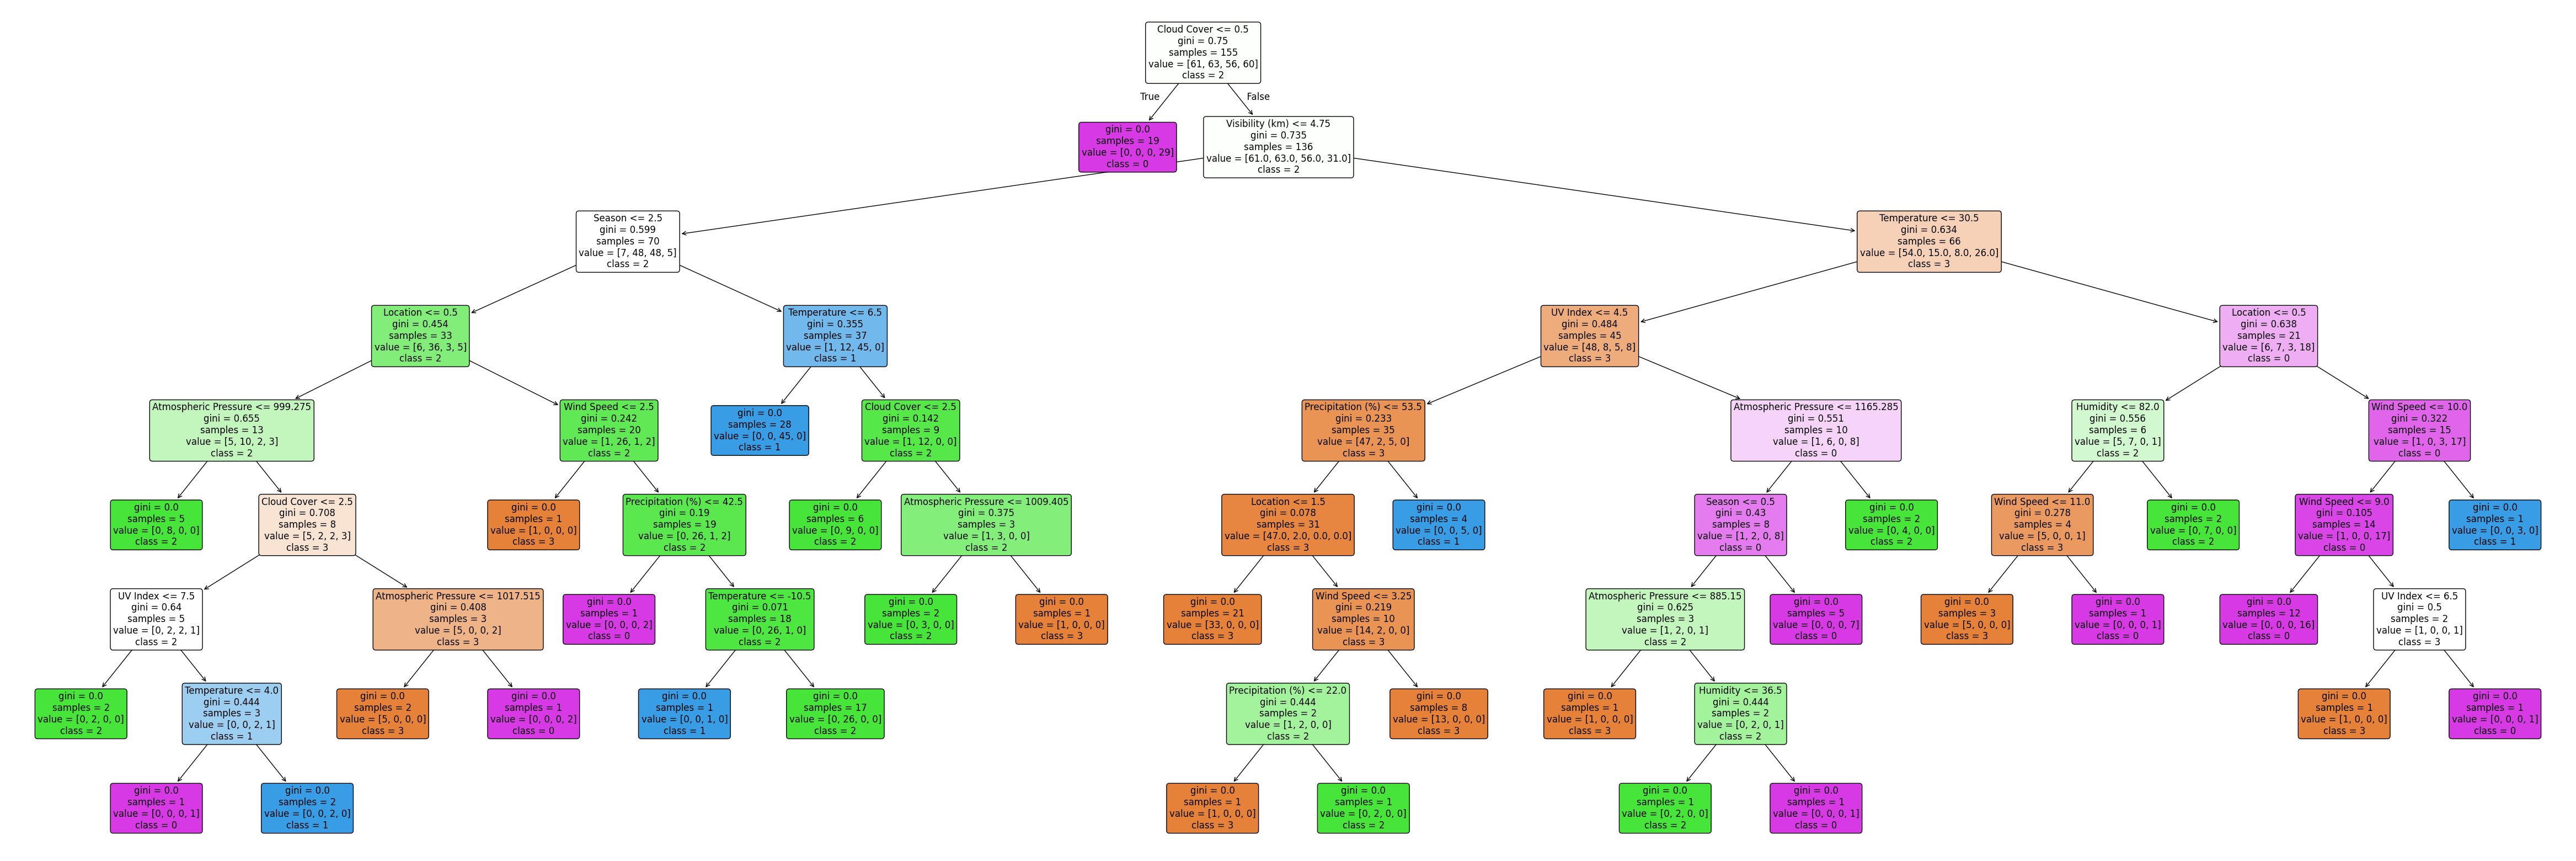

In [60]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Menampilkan salah satu pohon keputusan dalam Random Forest
plt.figure(figsize=(60, 20))
plot_tree(model.estimators_[0], filled=True, feature_names=X_train.columns, class_names=[str(cls) for cls in y.unique()], rounded=True, fontsize=12)
plt.show()


In [62]:
# Melihat distribusi kelas di target (y)
print(y.value_counts())
# Menyaring data untuk melihat tipe cuaca untuk masing-masing kelas
class_0_data = sampled_data[sampled_data['Weather Type'] == 0]  # Class 0
class_1_data = sampled_data[sampled_data['Weather Type'] == 1]  # Class 1
class_2_data = sampled_data[sampled_data['Weather Type'] == 2]  # Class 2
class_3_data = sampled_data[sampled_data['Weather Type'] == 3]  # Class 3

# Menampilkan beberapa contoh data untuk setiap kelas
print("Data untuk Class 0 (Weather Type = 0):")
print(class_0_data.head())

print("Data untuk Class 1 (Weather Type = 1):")
print(class_1_data.head())

print("Data untuk Class 2 (Weather Type = 2):")
print(class_2_data.head())

print("Data untuk Class 3 (Weather Type = 3):")
print(class_3_data.head())


Weather Type
3    80
2    77
1    73
0    70
Name: count, dtype: int64


NameError: name 'sampled_data' is not defined

In [53]:
import joblib

# Menyimpan model yang telah dilatih ke file
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']